In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import tensorflow as tf

In [2]:
#Read in data 112K rows
data = pd.read_csv('Data_Entry_2017.csv')
data.drop('Unnamed: 11',axis=1, inplace=True)
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168


In [3]:
#Add specific imagepath for correct diagnosis
images = {os.path.basename(x): x for x in 
                   glob(os.path.join('images*', '*', '*.png'))}
print('Scans found:', len(images), ', Total Headers', data.shape[0])
data['path'] = data['Image Index'].map(images.get)


Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
10184,00002642_000.png,No Finding,0,2642,41,F,PA,2992,2991,0.143000,0.143000,images_002/images/00002642_000.png
1885,00000491_010.png,Consolidation|Pneumothorax,10,491,38,M,PA,2021,2021,0.194311,0.194311,images_001/images/00000491_010.png
45861,00011741_004.png,No Finding,4,11741,16,M,PA,2500,2048,0.168000,0.168000,images_006/images/00011741_004.png


In [4]:
#Drop ages over 120
data = data[data['Patient Age']<120]

In [5]:
# Diagnosis to predict
data['clean_labels'] = data['Finding Labels'].apply(lambda x: x.split('|'))
labels = data['clean_labels'].str.join('|').str.get_dummies()
data = data.join(labels)

/home/slindhult/anaconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Atelectasis,Cardiomegaly,Consolidation,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,...,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000
mean,8.574172,14345.720724,46.872574,2646.035253,2486.393153,0.155651,0.155651,0.103101,0.024763,0.041631,...,0.022443,0.015040,0.002025,0.177433,0.051550,0.538366,0.056474,0.030186,0.012756,0.047286
std,15.406734,8403.980520,16.598152,341.243771,401.270806,0.016174,0.016174,0.304092,0.155402,0.199745,...,0.148121,0.121711,0.044954,0.382037,0.221118,0.498528,0.230836,0.171100,0.112220,0.212252
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7308.000000,35.000000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([67299.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44805.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

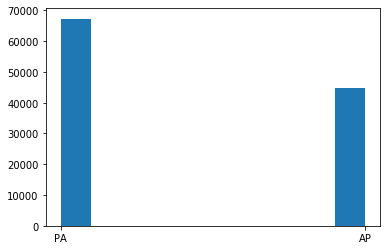

In [7]:
plt.hist(data['View Position'])

Text(0, 0.5, 'occurrences')

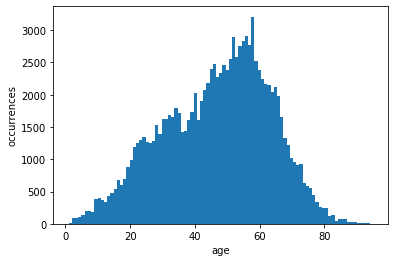

In [8]:
plt.hist(data['Patient Age'], bins=95);
plt.xlabel('age')
plt.ylabel('occurrences')

Text(0, 0.5, 'occurrences')

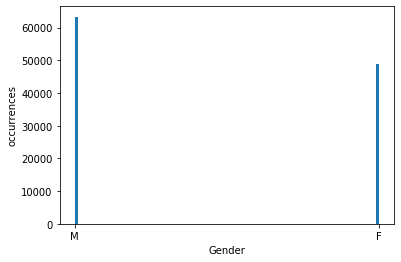

In [9]:
plt.hist(data['Patient Gender'], bins=95);
plt.xlabel('Gender')
plt.ylabel('occurrences')

Text(0, 0.5, 'occurrences')

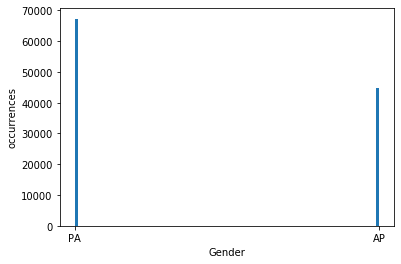

In [10]:
plt.hist(data['View Position'], bins=95);
plt.xlabel('Gender')
plt.ylabel('occurrences')

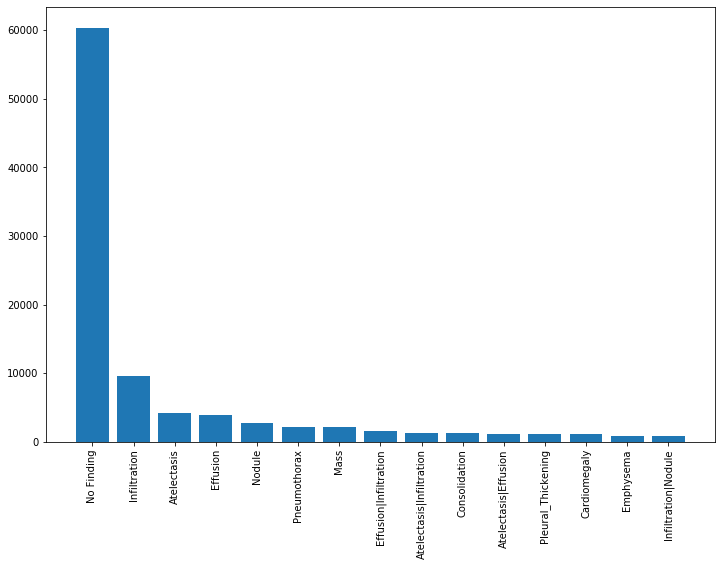

In [11]:
label_counts = data['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [12]:
m_df = data[data['Patient Gender']=='M']
f_df = data[data['Patient Gender']=='F']

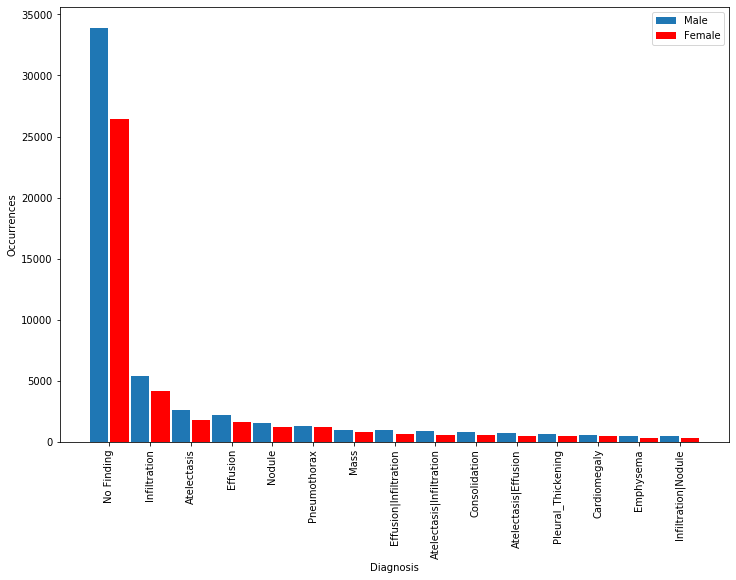

In [13]:
m_label_counts = m_df['Finding Labels'].value_counts()[:15]
f_label_counts = f_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(m_label_counts))+0.25, m_label_counts, width=0.45, label='Male')
ax1.bar(np.arange(len(f_label_counts))+0.75, f_label_counts, width=0.45, label='Female', color='red')
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Occurrences')
ax1.legend();

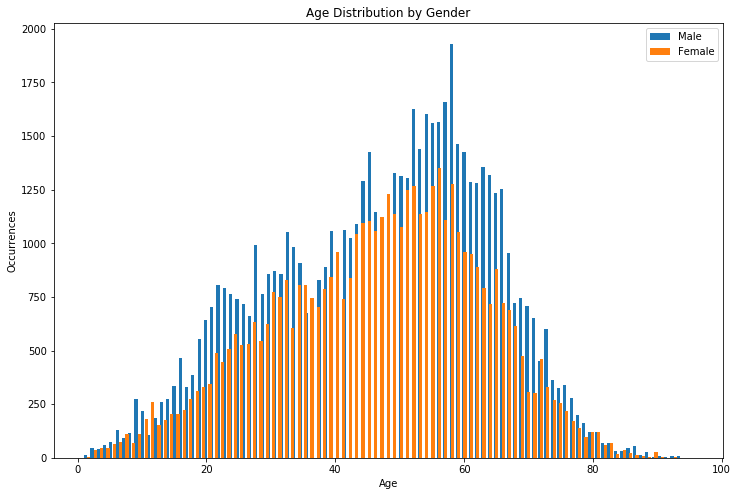

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(m_df['Patient Age'], bins=95, width = 0.5, label='Male')
ax.hist(f_df['Patient Age']+.5, bins=95, width = 0.5, label='Female')
ax.set_xlabel('Age')
ax.set_ylabel('Occurrences')
ax.set_title('Age Distribution by Gender')
ax.legend();

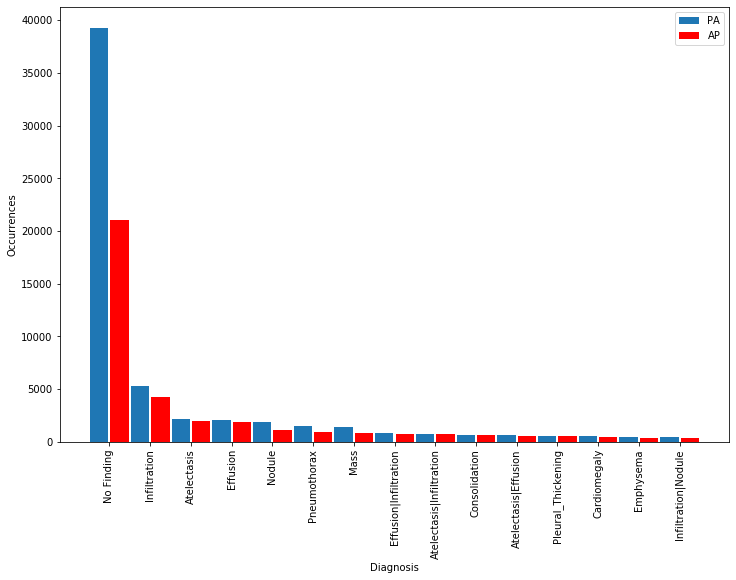

In [15]:
pa_df = data[data['View Position']=='PA']
ap_df = data[data['View Position']=='AP']


pa_label_counts = pa_df['Finding Labels'].value_counts()[:15]
ap_label_counts = ap_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(pa_label_counts))+0.25, pa_label_counts, width=0.45, label='PA')
ax1.bar(np.arange(len(ap_label_counts))+0.75, ap_label_counts, width=0.45, label='AP', color='red')
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Occurrences')
ax1.legend();

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (128, 128)
img_gen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

Clean Labels (14) [('Atelectasis', 11558), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2302), ('Effusion', 13316), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19891), ('Mass', 5779), ('No Finding', 60353), ('Nodule', 6331), ('Pleural_Thickening', 3384), ('Pneumonia', 1430), ('Pneumothorax', 5301)]
Found 16 validated image filenames belonging to 14 classes.


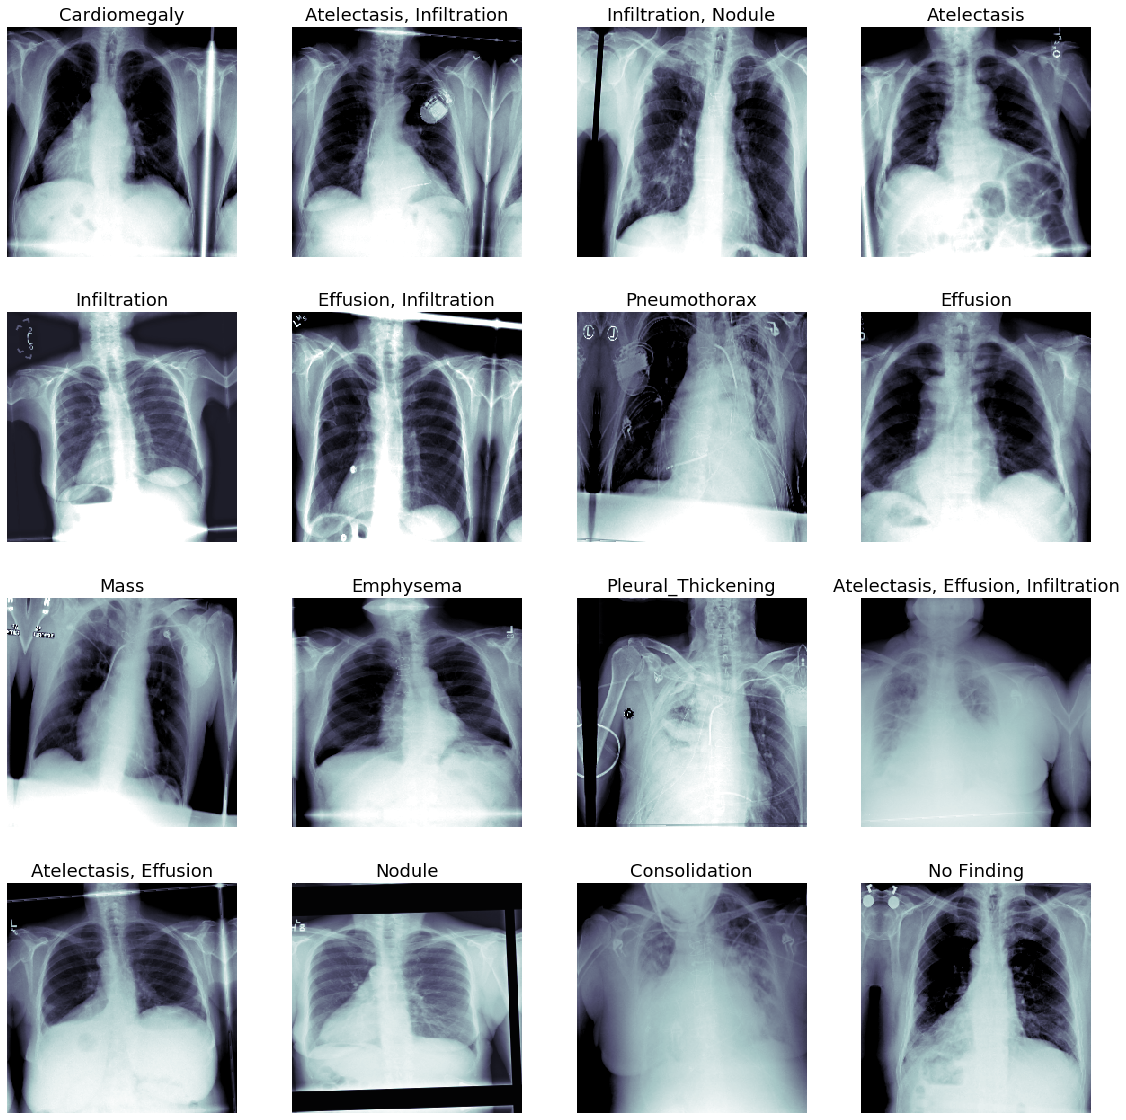

In [21]:
image_size = (128,128)
##show top 16 diagnosis
from itertools import chain
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
diags_list = data['Finding Labels'].value_counts().index[:16]
diag_img_list = []


all_labels = [c_label for c_label in all_labels if data[c_label].sum()>1000]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(data[c_label].sum())) for c_label in all_labels])


for i in diags_list:
    k = data[data['Finding Labels'] == i].index[0]
    diag_img_list.append(k)

imgs = data.filter(diag_img_list, axis=0)
imgs['newLabel'] = imgs.apply(lambda x: x['Finding Labels'].split('|'), axis=1)


diag_gen = img_gen.flow_from_dataframe(dataframe=imgs, directory=None, x_col = 'path',
y_col = 'newLabel', classmode = 'categorical',
classes = all_labels, targetsize = image_size, colormode = 'grayscale',
batch_size = 32)

t_x, t_y = next(diag_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]), fontsize=18)
    c_ax.axis('off')
    
fig.tight_layout()
fig.savefig('figures/diagnoses.jpg')

In [19]:
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
